In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv(
    "/Users/2mc/main/fis-phd/courses/big-data-ml/my-fork/Notebooks/scaling-test.csv"
)
print(df)

   num_workers  SEQ_training_time  SEQ_auc  SEQ_accuracy  RF_training_time  \
0            1              329.7    0.735         0.671              64.5   
1            2              160.6    0.728         0.669              61.5   
2            3              146.6    0.724         0.661              63.3   
3            4              110.3    0.706         0.652              57.8   
4            5               94.9    0.708         0.655              58.8   

   RF_auc  RF_accuracy  
0   0.789        0.711  
1   0.788        0.711  
2   0.788        0.711  
3   0.784        0.708  
4   0.784        0.708  


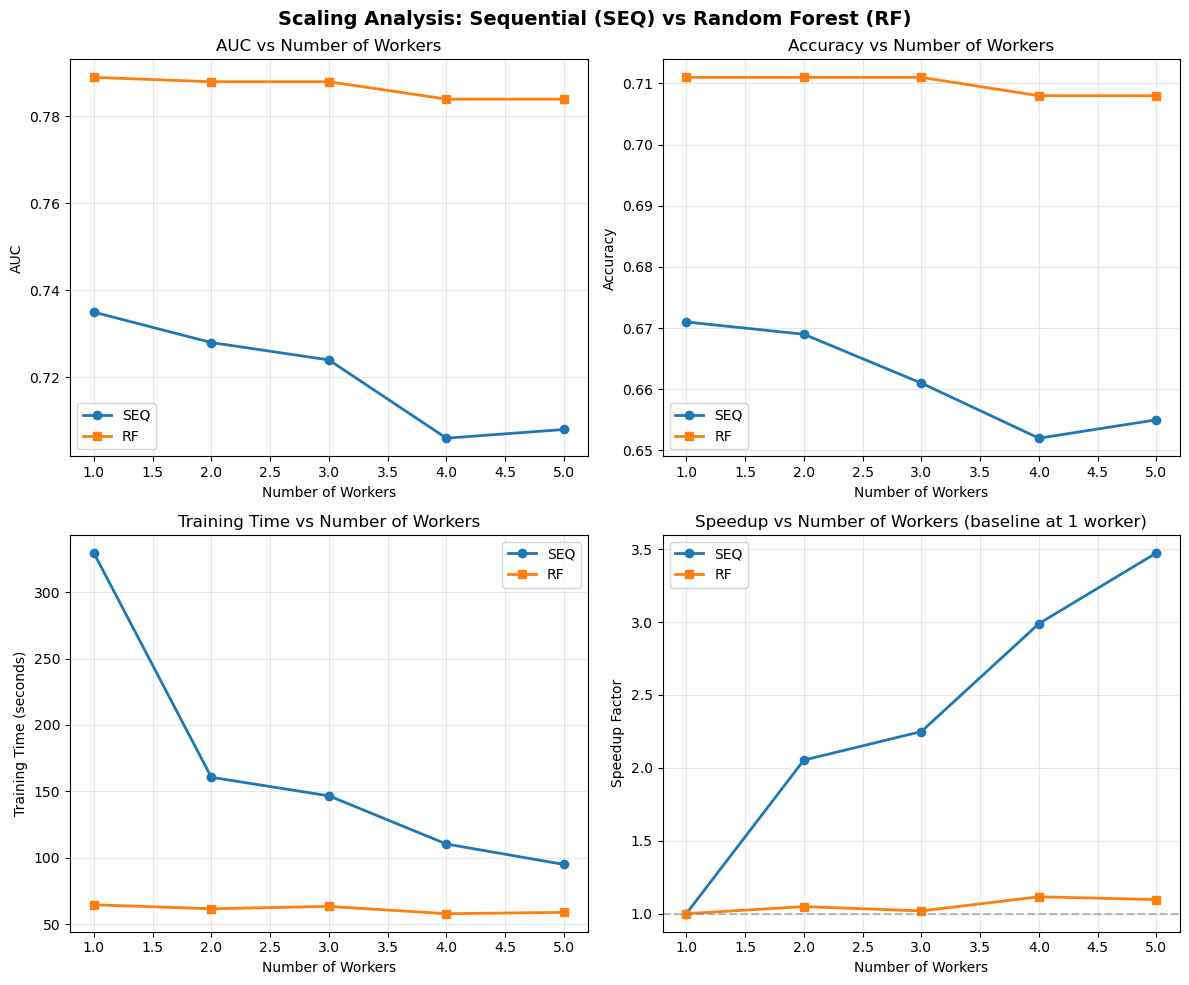

In [6]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle(
    "Scaling Analysis: Sequential (SEQ) vs Random Forest (RF)",
    fontsize=14,
    fontweight="bold",
)


# Plot 1: AUC
ax1 = axes[0, 0]
ax1.plot(df["num_workers"], df["SEQ_auc"], marker="o", label="SEQ", linewidth=2)
ax1.plot(df["num_workers"], df["RF_auc"], marker="s", label="RF", linewidth=2)
ax1.set_xlabel("Number of Workers")
ax1.set_ylabel("AUC")
ax1.set_title("AUC vs Number of Workers")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Accuracy
ax2 = axes[0, 1]
ax2.plot(df["num_workers"], df["SEQ_accuracy"], marker="o", label="SEQ", linewidth=2)
ax2.plot(df["num_workers"], df["RF_accuracy"], marker="s", label="RF", linewidth=2)
ax2.set_xlabel("Number of Workers")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy vs Number of Workers")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Training Time
ax3 = axes[1, 0]
ax3.plot(
    df["num_workers"], df["SEQ_training_time"], marker="o", label="SEQ", linewidth=2
)
ax3.plot(df["num_workers"], df["RF_training_time"], marker="s", label="RF", linewidth=2)
ax3.set_xlabel("Number of Workers")
ax3.set_ylabel("Training Time (seconds)")
ax3.set_title("Training Time vs Number of Workers")
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Speedup (Training Time Reduction)
ax4 = axes[1, 1]
speedup_seq = df["SEQ_training_time"].iloc[0] / df["SEQ_training_time"]
speedup_rf = df["RF_training_time"].iloc[0] / df["RF_training_time"]
ax4.plot(df["num_workers"], speedup_seq, marker="o", label="SEQ", linewidth=2)
ax4.plot(df["num_workers"], speedup_rf, marker="s", label="RF", linewidth=2)
ax4.axhline(y=1, color="gray", linestyle="--", alpha=0.5)
ax4.set_xlabel("Number of Workers")
ax4.set_ylabel("Speedup Factor")
ax4.set_title("Speedup vs Number of Workers (baseline at 1 worker)")
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("scaling-test.png", dpi=300, bbox_inches="tight")
plt.show()
